<a href="https://colab.research.google.com/github/bbinibini/Deep-Learning-Paper-Review-and-Practice/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#https://riverkangg.github.io/nlp/nlp-bertWordEmbedding/
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [5]:
text = "임베딩을 시도할 문장이다."
marked_text = "[CLS] " + text + " [SEP]"

In [6]:
marked_text

'[CLS] 임베딩을 시도할 문장이다. [SEP]'

In [9]:
# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text) #WordPiece 모델을 사용
print(tokenized_text)

['[CLS]', '임', '##베', '##딩', '##을', '시', '##도', '##할', '문', '##장이', '##다', '.', '[SEP]']


In [11]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "배를 타고 여행을 간다." \
       "추석에 먹은 배가 맛있었다."

In [12]:
# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

In [14]:
# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)
tokenized_text

['[CLS]',
 '배',
 '##를',
 '타',
 '##고',
 '여',
 '##행을',
 '간',
 '##다',
 '.',
 '추',
 '##석',
 '##에',
 '먹',
 '##은',
 '배',
 '##가',
 '맛',
 '##있',
 '##었다',
 '.',
 '[SEP]']

In [16]:
# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
indexed_tokens

[101,
 9330,
 11513,
 9845,
 11664,
 9565,
 88904,
 8845,
 11903,
 119,
 9765,
 40958,
 10530,
 9266,
 10892,
 9330,
 11287,
 9254,
 119192,
 17706,
 119,
 102]

In [17]:
# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
배             9,330
##를          11,513
타             9,845
##고          11,664
여             9,565
##행을         88,904
간             8,845
##다          11,903
.               119
추             9,765
##석          40,958
##에          10,530
먹             9,266
##은          10,892
배             9,330
##가          11,287
맛             9,254
##있          119,192
##었다         17,706
.               119
[SEP]           102


In [18]:
# Mark each of the 29 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)
print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [19]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [20]:
tokens_tensor

tensor([[   101,   9330,  11513,   9845,  11664,   9565,  88904,   8845,  11903,
            119,   9765,  40958,  10530,   9266,  10892,   9330,  11287,   9254,
         119192,  17706,    119,    102]])

In [21]:
segments_tensors

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [23]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-multilingual-cased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [24]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [37]:
outputs[0].size() #last_hidden_state

torch.Size([1, 22, 768])

In [33]:
outputs[1].size() #pooler_output

torch.Size([1, 768])

In [36]:
len(outputs[2]) #hidden_states

13

In [39]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


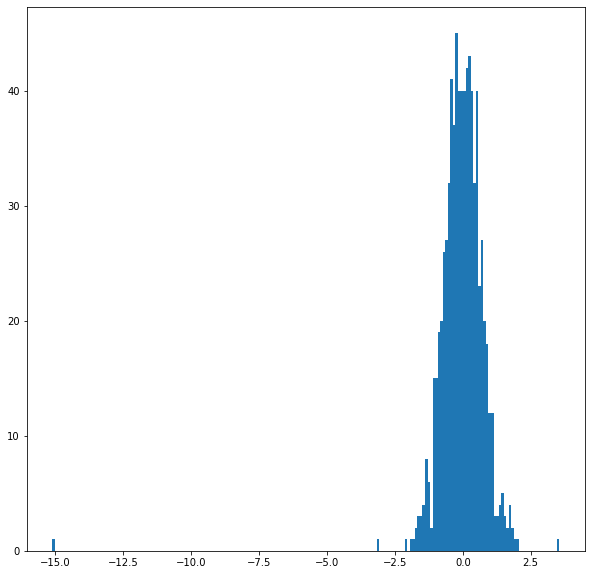

In [40]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [50]:
# `hidden_states` is a Python list.
print('      Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

      Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([1, 22, 768])


In [51]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
# 레이어별로 값을 그룹화하는 것이 모델에 적합하지만, 단어 임베딩을 위해 토큰별로 그룹화한다.
# 레이어를 결합해서 하나의 큰 텐서를 만든다.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 22, 768])

In [52]:
#“batches” 차원은 필요하지 않으므로 제거한다.
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 22, 768])

In [53]:
#마지막으로 permute를 사용하여 “layers” 및 “tokens” 차원을 전환할 수 있다.
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([22, 13, 768])

In [56]:
#각 토큰에 대한 개별 벡터 또는 전체 문장의 단일 벡터 표현을 얻고 싶지만, 
#입력의 각 토큰에 대해 각각 768 크기의 13개의 개별 벡터가 있다.
#개별 벡터를 얻으려면 일부 레이어 벡터를 결합해야한다.
#하지만 몇 가지 합리적인 접근 방식을 시도해보고, 추가로 살펴볼 수 있는 몇 가지 유용한 리소스를 소개한다.

 ##### Word Vectors

In [71]:
# 먼저 마지막 4개의 레이어를 연결하여(concatenate) 토큰 당 단일 단어 벡터를 제공한다. 
# 각 벡터의 길이는 4 x 768 = 3,072
# Stores the token vectors, with shape [36 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [36 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 22 x 3072


In [70]:
#다른 방법으로 마지막 4개의 레이어를 합산하여(summing) 단어 벡터를 만든다.
# Stores the token vectors, with shape [36 x 768]
token_vecs_sum = []

# `token_embeddings` is a [36 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 22 x 768


#### Sentence Vectors

In [76]:
# 전체 문장에 대한 단일 벡터를 얻기 위해 여러 application-dependent 전략이 있지만, 
# 간단한 접근 방식은 단일 768 크기의 벡터를 생성하는 각 토큰의 두번째에서 
# 마지막 숨겨진 레이어를 평균내는 것이다.

# `hidden_states` has shape [13 x 1 x 36 x 768]

# `token_vecs` is a tensor with shape [36 x 768]
token_vecs = hidden_states[-2][0]

# Calculate the average of all 36 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)
sentence_embedding.size()

torch.Size([768])

##### 상황에 따라 달라지는지 확인

In [77]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 배
2 ##를
3 타
4 ##고
5 여
6 ##행을
7 간
8 ##다
9 .
10 추
11 ##석
12 ##에
13 먹
14 ##은
15 배
16 ##가
17 맛
18 ##있
19 ##었다
20 .
21 [SEP]


In [79]:
# '배' 라는 단어는 1, 15에 있다.
#  이 분석에서는 마지막 4 개의 레이어를 합산하여 만든 단어 벡터를 사용

In [81]:
len(token_vecs_sum)

22

In [84]:
print('First 5 vector values for each instance of "배".')
print('')
print(" 배를 타다", str(token_vecs_sum[1][:5]))
print("과일 배  ", str(token_vecs_sum[15][:5]))

First 5 vector values for each instance of "배".

 배를 타다 tensor([-3.8934, -3.9059, -1.5779,  2.4786,  2.2829])
과일 배   tensor([-3.3566, -2.3208, -4.7532,  0.5019,  3.6503])


In [85]:
#더 정확한 비교를 위해 벡터 간의 코사인 유사성을 계산
from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the word 배 
# in "배를 타다" vs "배를 먹다" (different meanings).
diff_배 = 1 - cosine(token_vecs_sum[1], token_vecs_sum[15])

# Calculate the cosine similarity between the word 배
# in "배를 타다" vs "바다에 있는 배" (same meaning).
same_배 = 1 - cosine(token_vecs_sum[10], token_vecs_sum[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_배)
print('Vector similarity for *different* meanings:  %.2f' % diff_배)